In [20]:
import pandas as pd
from datetime import datetime
from matplotlib import pyplot as  plt
import plotly.graph_objects as go

In [3]:
df = pd.read_csv("../data/csv_files/at200.csv")
df.size

2306744

In [4]:
del(df["Level: Elevation (m)"])

In [5]:
df = df.dropna()

In [6]:
# the datetime is converted to timestamp in seconds
df['Date Time'] = df['Date Time'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S.%f').timestamp() * 1000)
df.size

822927

In [15]:
all_stations = df.groupby("station_id")
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'purple','turquoise','lime', 'gold', "slategray"]

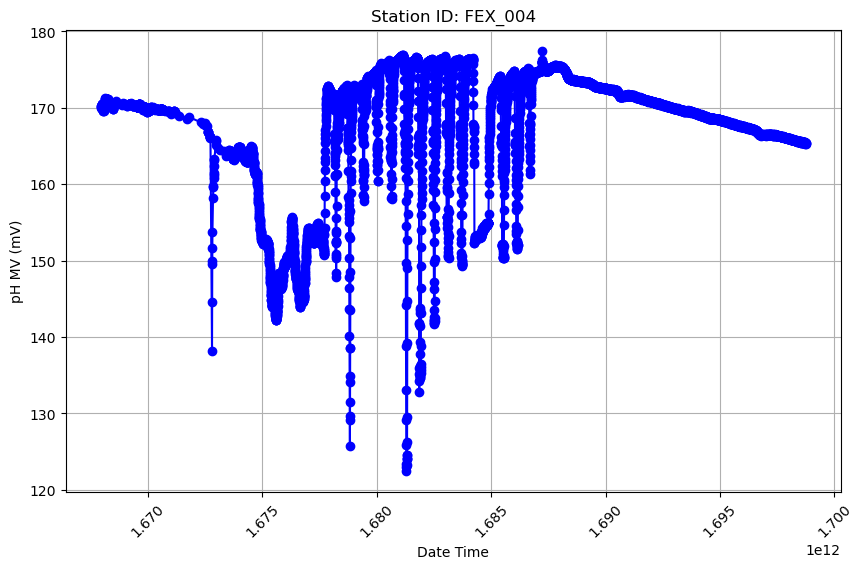

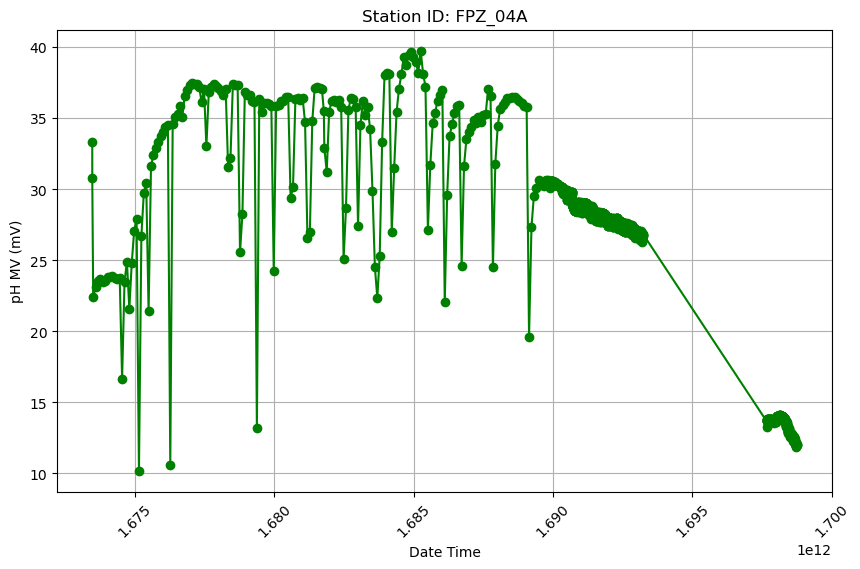

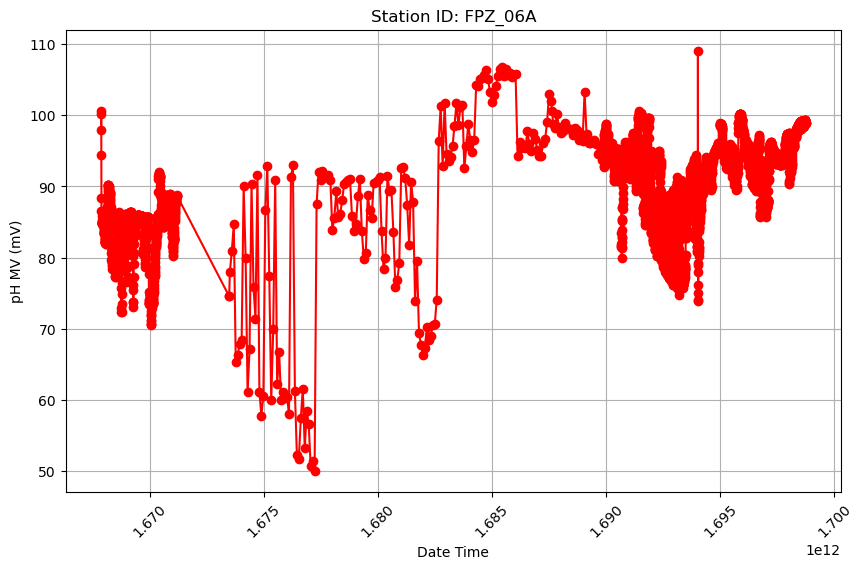

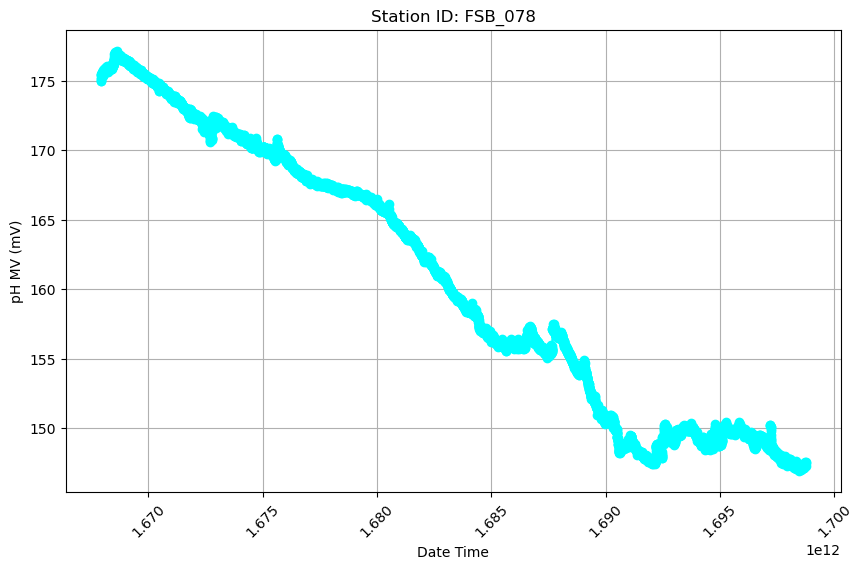

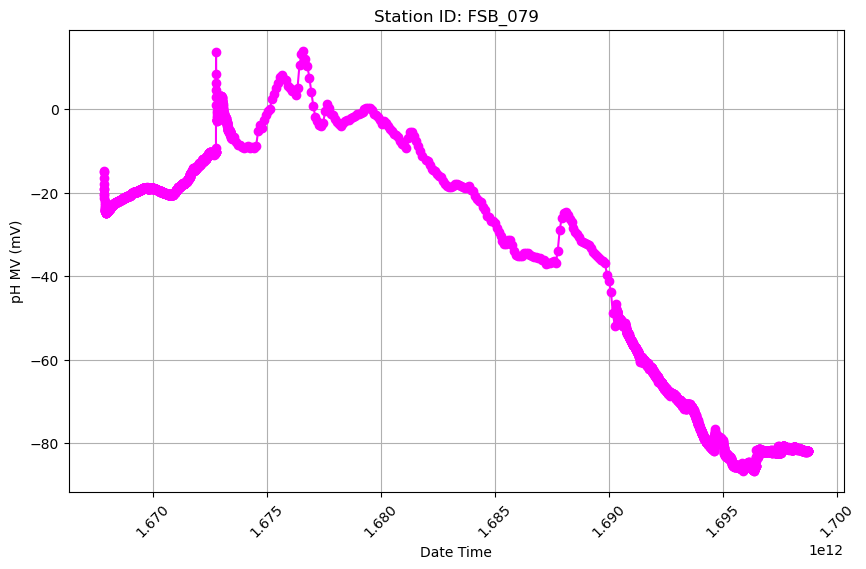

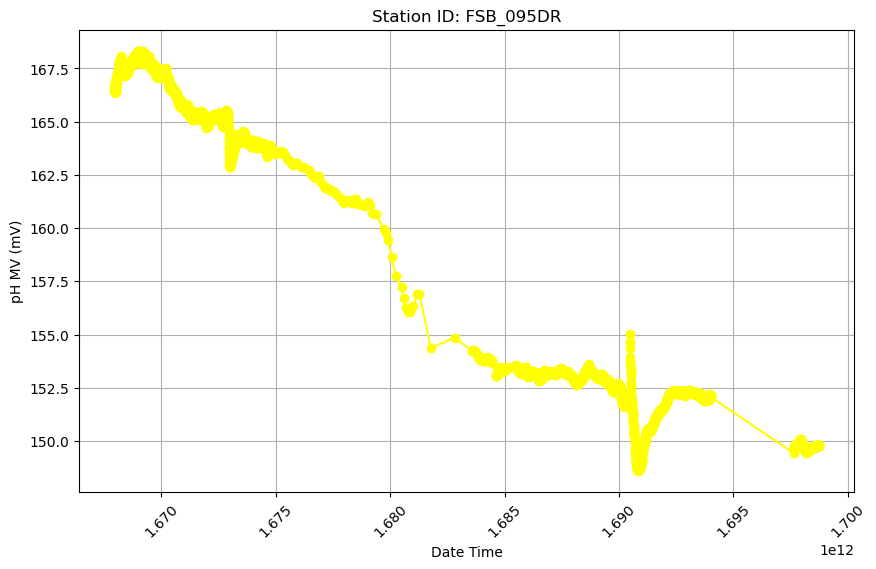

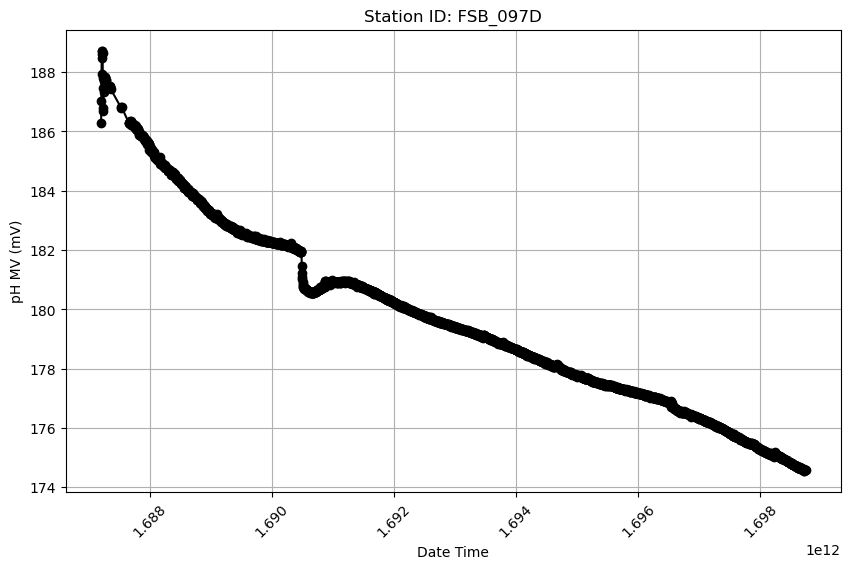

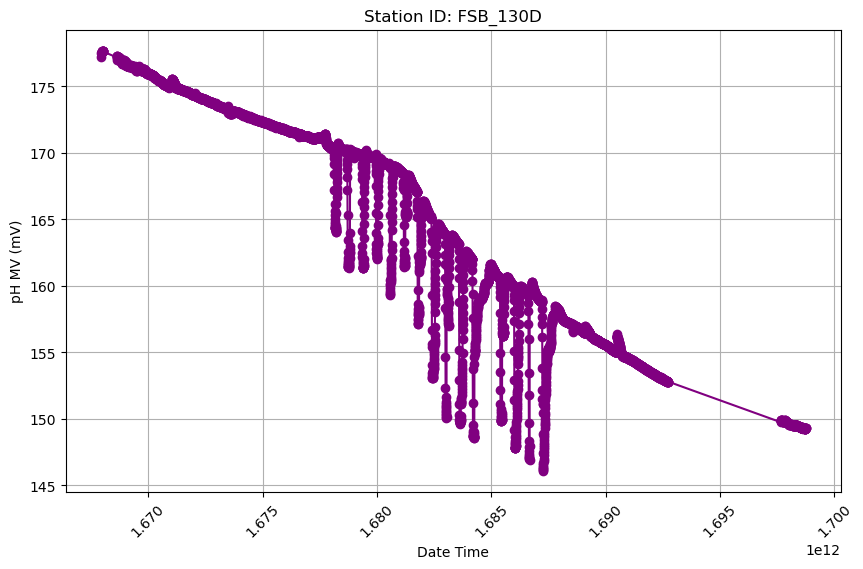

In [17]:
for index, stations in enumerate(all_stations):
    station_id, group = stations
    plt.figure(figsize=(10, 6))
    plt.plot(group['Date Time'], group['pH MV (mV)'], marker='o', color = colors[index])
    plt.title(f'Station ID: {station_id}')
    plt.xlabel('Date Time')
    plt.ylabel('pH MV (mV)')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

In [9]:
# Downsample the data: for instance, taking every 10th point
df_downsampled = first_df.iloc[::10, :]
df_downsampled.size

3003

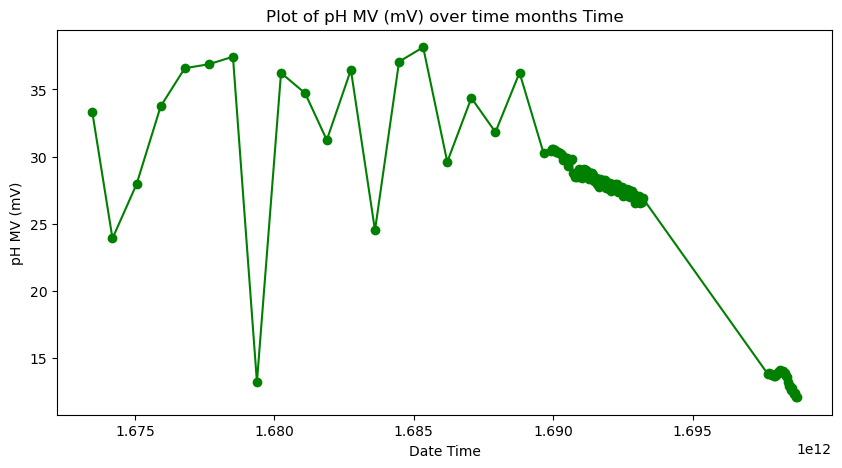

In [15]:
plt.figure(figsize=(10, 5))
plt.plot(df_downsampled["Date Time"], df_downsampled["pH MV (mV)"], marker='o', linestyle='-', color="green")
plt.xlabel('Date Time')
plt.ylabel('pH MV (mV)')
plt.title(f'Plot of pH MV (mV) over time months Time')
plt.show()

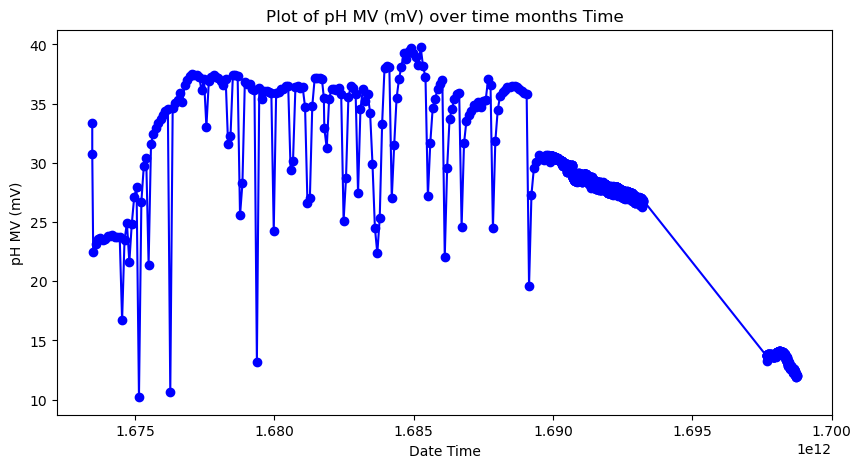

In [16]:
plt.figure(figsize=(10, 5))
plt.plot(first_df["Date Time"], first_df["pH MV (mV)"], marker='o', linestyle='-', color="blue")
plt.xlabel('Date Time')
plt.ylabel('pH MV (mV)')
plt.title(f'Plot of pH MV (mV) over time months Time')
plt.show()

In [18]:
# test with first station id i.e. FEX_004
test_station = df[df["station_id"] == "FEX_004"]
test_station

,Date Time,Actual Conductivity (ÂµS/cm),Specific Conductivity (ÂµS/cm),Salinity (psu),Resistivity (â„¦-cm),Density (g/cmÂ³),Total Dissolved Solids (mg/L),pH (pH),pH MV (mV),ORP (mV),...,% Saturation Oâ‚‚ (% sat),Partial Pressure Oâ‚‚ (psi),Temperature (C),External Voltage (V),Pressure (psi),Depth (m),Level: Depth to Water (m),station_id,easting,northing
16110,1.667947e+12,94.905998,96.302986,0.050002,10536.742188,0.998398,62.596940,4.011594,170.168884,374.163971,...,87.240013,2.480084,19.240515,15.822,7.988865,5.817411,8.618866,FEX_004,1383210.914,3875906.773
16113,1.667956e+12,94.867561,96.284531,0.049994,10541.010742,0.998401,62.584944,4.011260,170.180801,374.669403,...,87.018036,2.468964,19.229504,15.795,7.995261,5.821551,8.614362,FEX_004,1383210.914,3875906.773
16114,1.667959e+12,94.724960,96.141701,0.049917,10556.879883,0.998401,62.492106,4.012510,170.111664,374.583588,...,87.157501,2.472089,19.228483,15.813,7.999542,5.824568,8.611347,FEX_004,1383210.914,3875906.773
16115,1.667963e+12,94.637291,96.051628,0.049869,10566.659180,0.998400,62.433559,4.014647,169.994827,374.578796,...,87.167442,2.472286,19.229069,15.795,8.000001,5.824894,8.611024,FEX_004,1383210.914,3875906.773
16116,1.667966e+12,94.575859,95.988159,0.049834,10573.522461,0.998400,62.392302,4.014958,169.978149,374.566895,...,87.095116,2.469659,19.229670,15.813,7.994331,5.820900,8.615017,FEX_004,1383210.914,3875906.773
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24668,1.698728e+12,527.672668,536.275696,0.290764,1895.114258,0.998599,348.579198,4.098258,165.371887,128.065918,...,1.572189,0.052198,19.160097,15.786,11.459490,8.259589,8.155900,FEX_004,1383210.914,3875906.773
24669,1.698732e+12,527.711975,536.292908,0.290772,1894.973145,0.998598,348.590374,4.098106,165.381439,128.154129,...,1.573760,0.052244,19.162279,15.786,11.459060,8.259291,8.156202,FEX_004,1383210.914,3875906.773
24670,1.698736e+12,527.727844,536.315979,0.290785,1894.916138,0.998599,348.605394,4.099752,165.290833,128.270966,...,1.584903,0.052555,19.160395,15.777,11.460961,8.260627,8.154863,FEX_004,1383210.914,3875906.773
24671,1.698739e+12,527.727478,536.312134,0.290783,1894.917480,0.998599,348.602891,4.098408,165.364746,128.373474,...,1.580947,0.052443,19.161945,15.777,11.461056,8.260693,8.154798,FEX_004,1383210.914,3875906.773


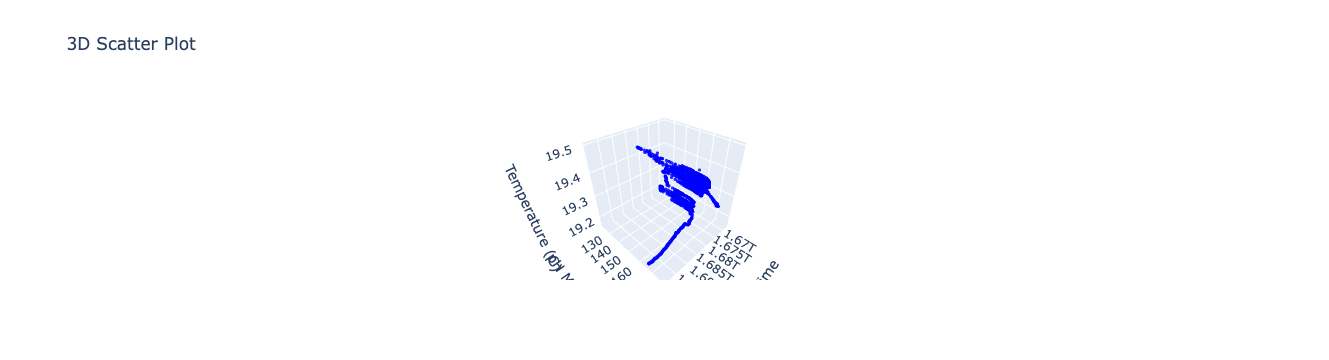

In [23]:
fig = go.Figure(data=[go.Scatter3d(
    x=test_station['Date Time'],
    y=test_station['pH MV (mV)'],
    z=test_station['Temperature (C)'],
    mode='markers',
    marker=dict(
        size=2,
        color='blue',                # set color to an array/list of desired values
        opacity=0.8
    )
)])

# Set labels and title
fig.update_layout(
    scene=dict(
        xaxis_title='Date Time',
        yaxis_title='pH MV (mV)',
        zaxis_title='Temperature (C)'
    ),
    title='3D Scatter Plot'
)

fig.show()